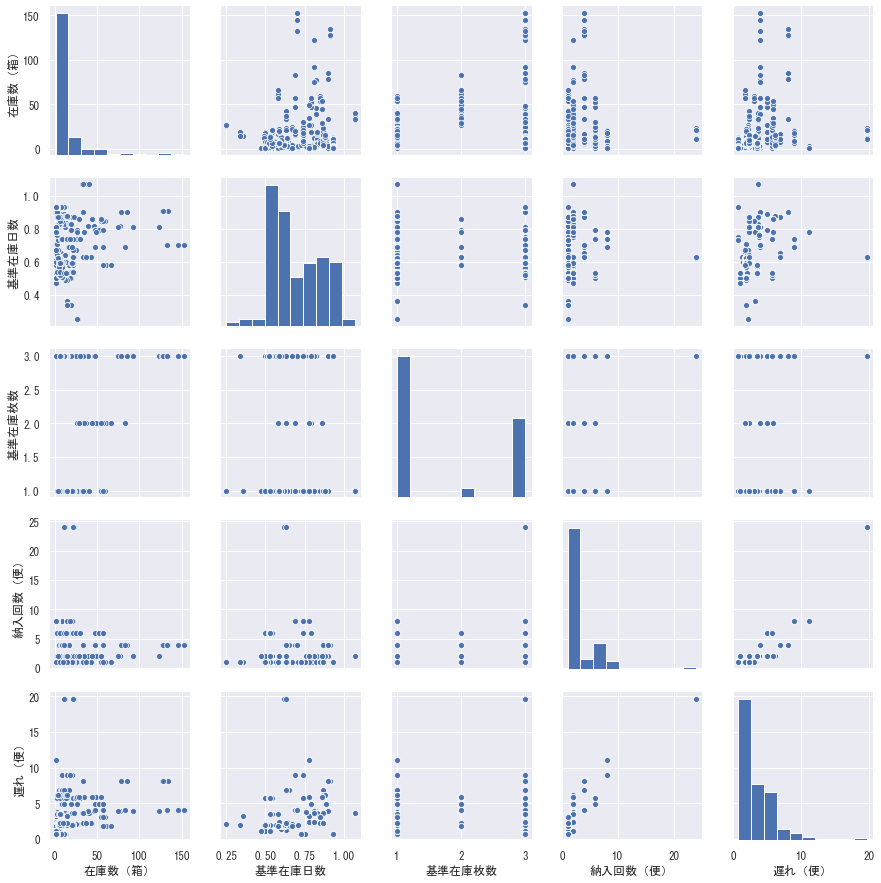

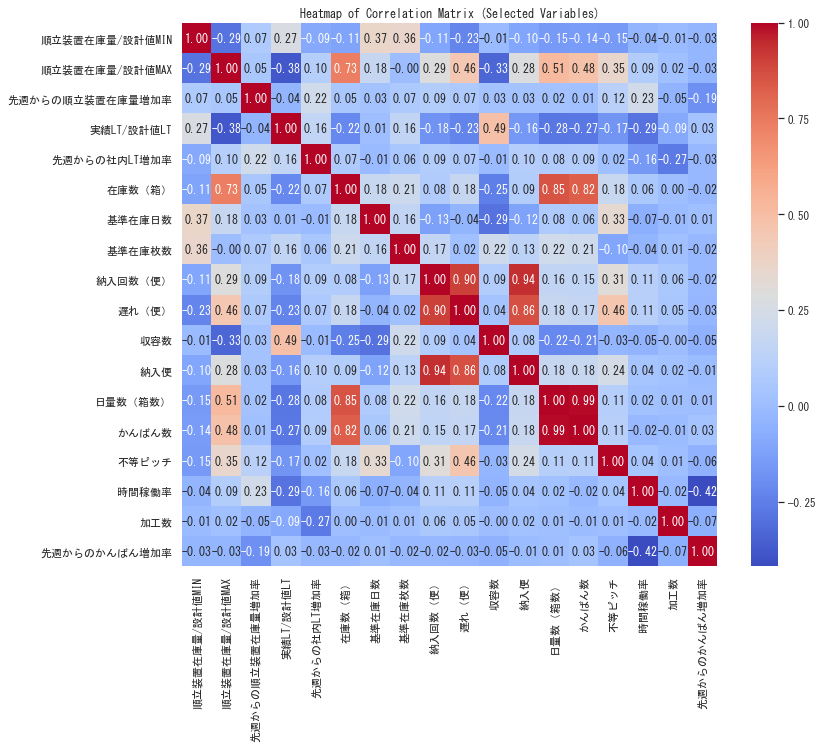

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# データの読み込み（データのパスは適宜変更してください）
file_path = 'data.csv'
data = pd.read_csv(file_path, encoding='shift-jis')  # エンコーディングは必要に応じて変更

# 'Unnamed: 0' と 'Year' 列を除外し、数値型のデータのみを選択
data_cleaned = data.drop(['Unnamed: 0', 'Year','A','Week_Number','入庫数（箱）','出庫数（箱）','社内LT（検収〜回収LT）'], axis=1).select_dtypes(include='number')
data_cleaned = data_cleaned.rename(columns={'OPERATION_RATE': '時間稼働率'})
data_cleaned = data_cleaned.rename(columns={'KAKO_CNT': '加工数'})
data_cleaned = data_cleaned.rename(columns={'B': '納入回数（便）'})
data_cleaned = data_cleaned.rename(columns={'C': '遅れ（便）'})

# 散布図を描画する変数を定義
y_variables = [
    '順立装置在庫量/設計値MIN', 
    '順立装置在庫量/設計値MAX', 
    '先週からの順立装置在庫量増加率', 
    '実績LT/設計値LT', 
    '先週からの社内LT増加率'
]
x_variables = [col for col in data_cleaned.columns if col not in y_variables]

# 散布図行列（データセットの数値型の列を限定的に選択）
pairplot_columns = data_cleaned.select_dtypes(include=['float64', 'int64']).columns[:5]
sns.pairplot(data_cleaned[pairplot_columns])
plt.show()

# 選択した変数に基づいて相関行列を計算し、ヒートマップを描画
selected_variables = y_variables + x_variables
corr_matrix_selected = data_cleaned[selected_variables].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_selected, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Heatmap of Correlation Matrix (Selected Variables)")
filename = 'kari1.png'
plt.savefig(filename)
plt.show()

In [53]:
# 'Unnamed: 0' と 'Year' 列を除外し、数値型のデータのみを選択
data_cleaned = data.drop(['Unnamed: 0', 'Year','A','Week_Number'], axis=1).select_dtypes(include='number')

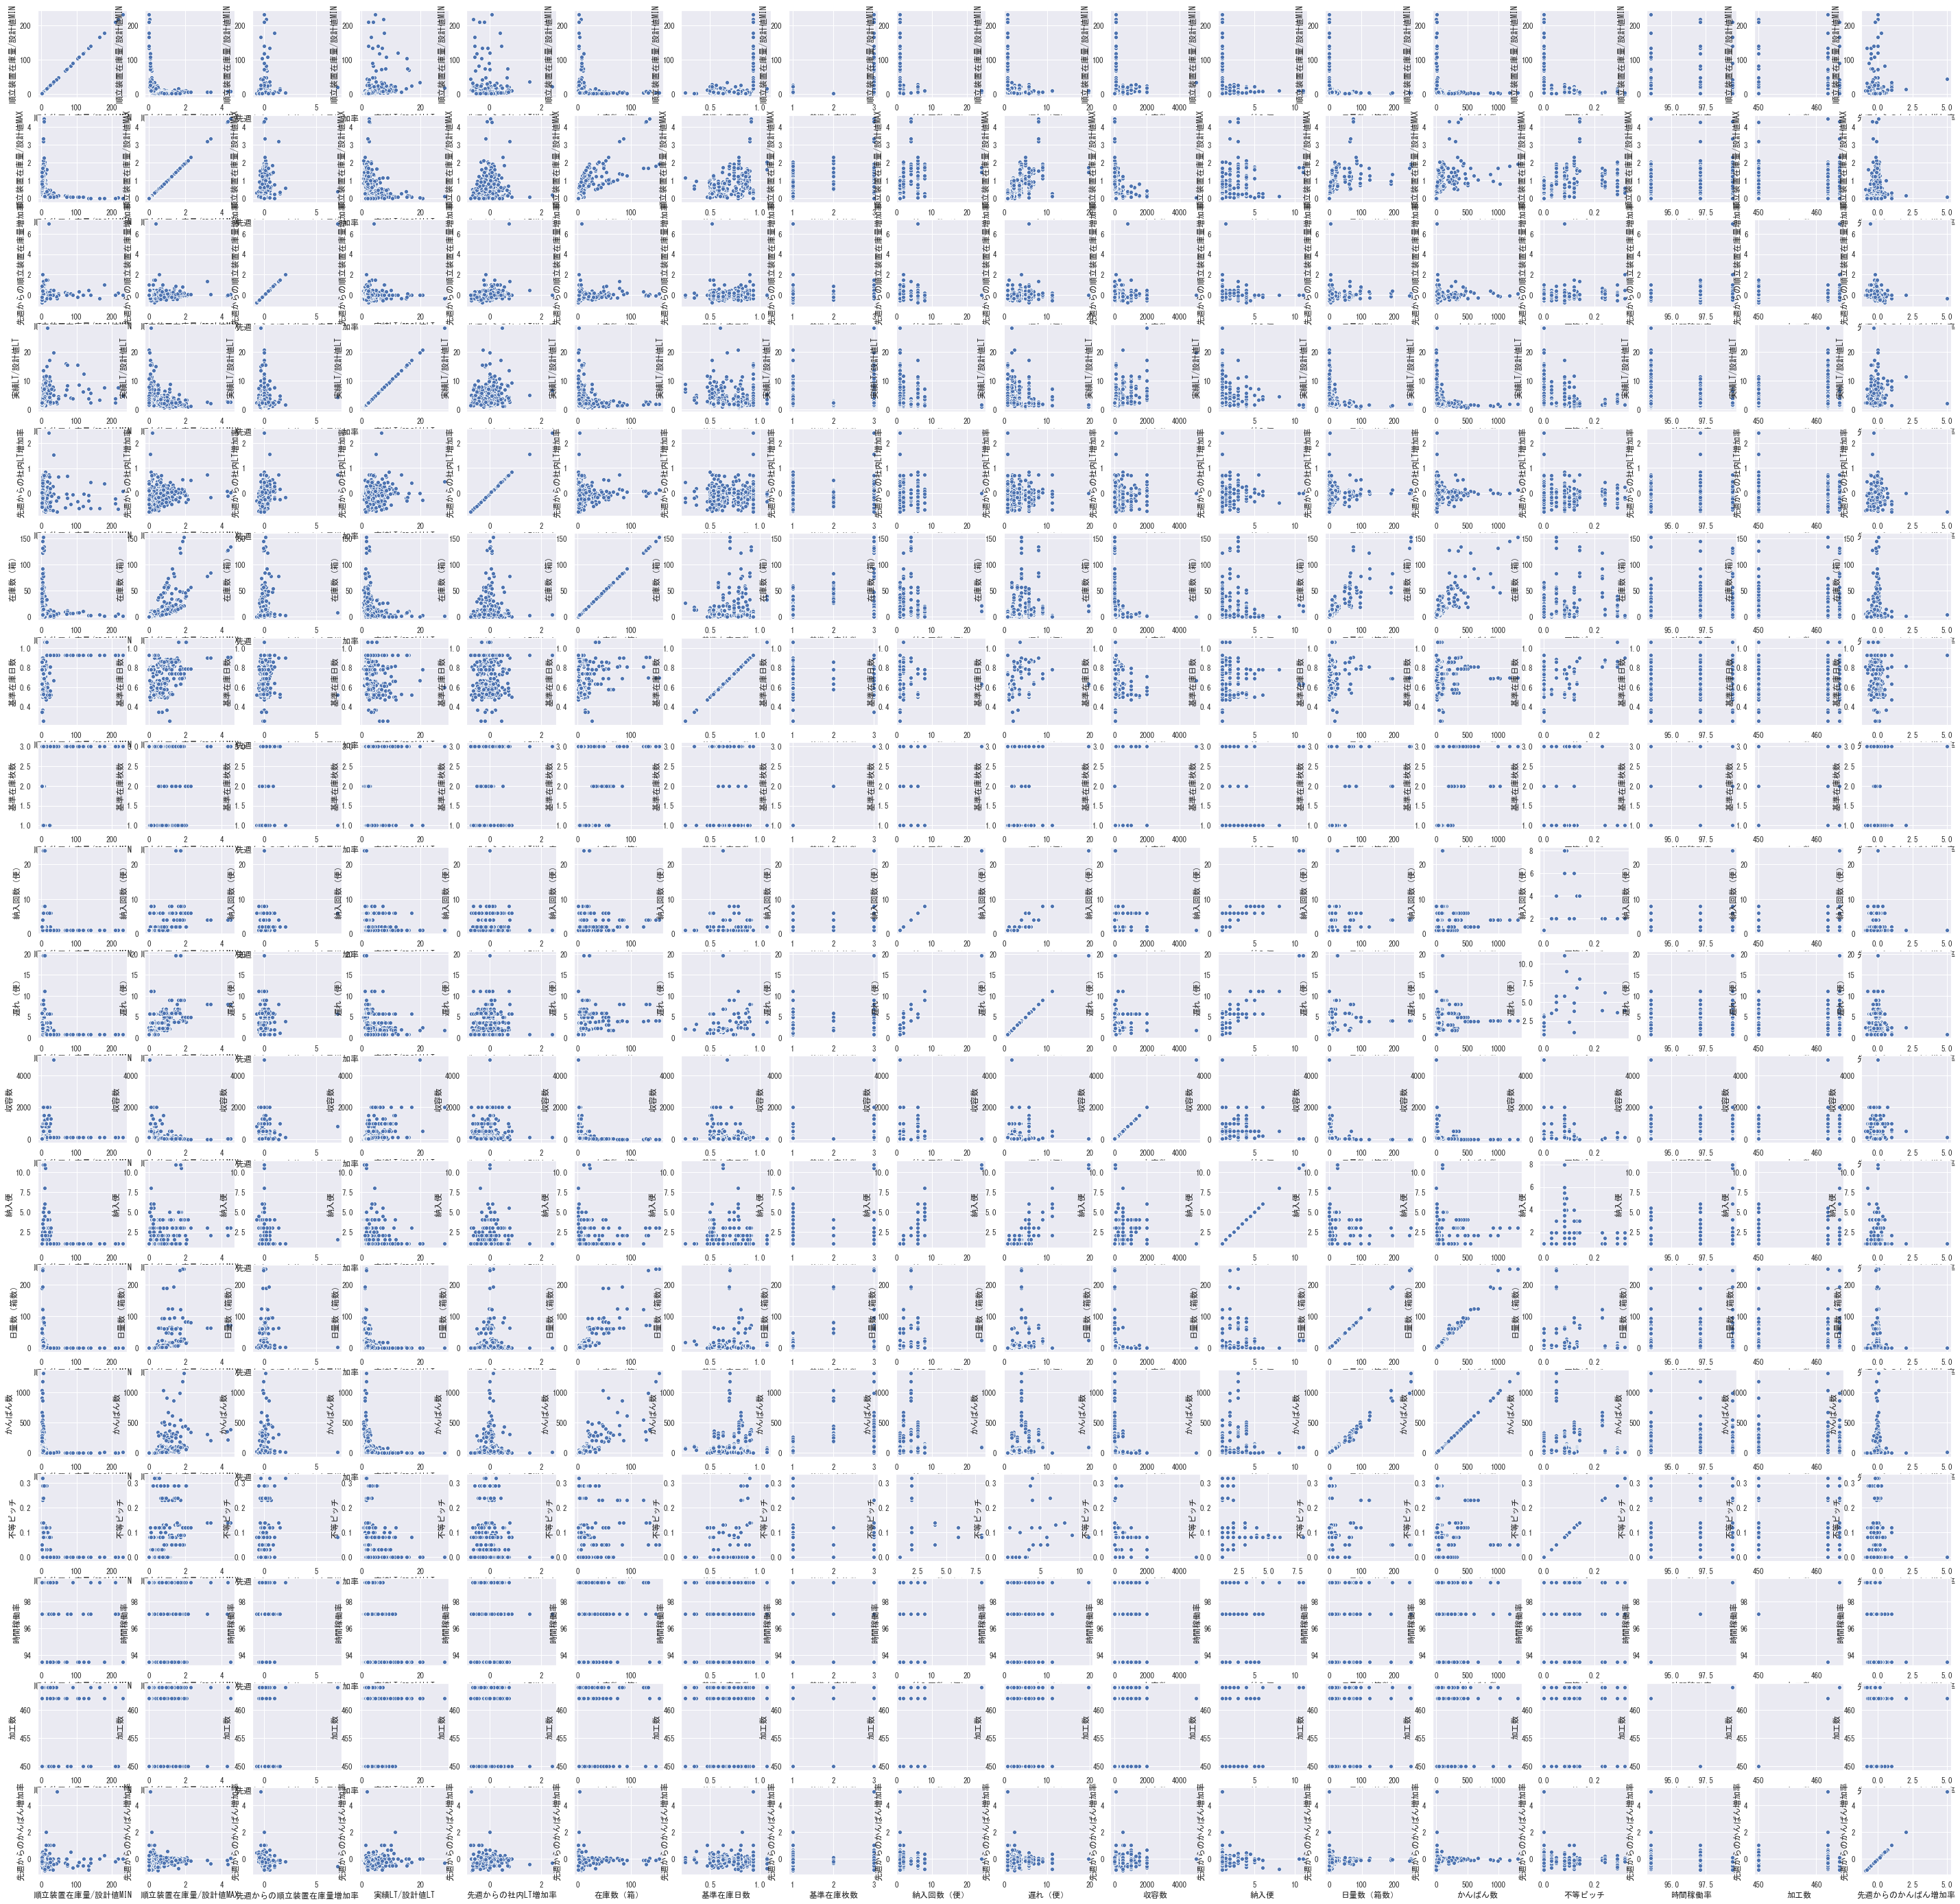

In [75]:
# 散布図を描画する変数を定義
y_variables = [
    '順立装置在庫量/設計値MIN', 
    '順立装置在庫量/設計値MAX', 
    '先週からの順立装置在庫量増加率', 
    '実績LT/設計値LT', 
    '先週からの社内LT増加率'
]
x_variables = [col for col in data_cleaned.columns if col not in y_variables]

variables = [col for col in data_cleaned.columns]

v = y_variables+x_variables

i=1
l = len(y_variables,)+len(x_variables)
plt.figure(figsize=(50,50))# 各変数の組み合わせごとに散布図を描画
sns.set(font='MS Gothic') 
for y_var in v:#variables:
    for x_var in v:#variables:
        plt.subplot(l,l,i)
        sns.scatterplot(x=data_cleaned[x_var], y=data_cleaned[y_var])
        #plt.title(f'Scatter Plot of {y_var} vs {x_var}')
        i=i+1

filename = 'kari2.png'
plt.savefig(filename)
plt.show()

In [28]:
import matplotlib as mpl

# Setting Japanese font for matplotlib
mpl.rcParams['font.family'] = 'IPAexGothic'



In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# データの読み込み
file_path_new = 'data.csv'
data_new_shiftjis = pd.read_csv(file_path_new, encoding='shift-jis')

# 特徴量とターゲット変数の選択
features = data_new_shiftjis[['順立装置在庫量/設計値MIN', '順立装置在庫量/設計値MAX', '先週からの順立装置在庫量の増加率', '実績LT/設計値LT', '先週からの社内LTの増加率']]
target_column = data_new_shiftjis.drop(features.columns, axis=1).columns[0]
target_mapped = data_new_shiftjis[target_column].astype('category').cat.codes

# 特徴量のクリーンアップ
def replace_large_values(series):
    float64_max = np.finfo(np.float64).max
    series[series.abs() > float64_max] = np.nan
    return series

features_clean_replaced = features.copy()
features_clean_replaced = features_clean_replaced.apply(replace_large_values)
features_clean_replaced = features_clean_replaced.replace([np.inf, -np.inf], np.nan).fillna(features_clean_replaced.mean())

# データセットの分割
X_train_cleaned, X_test_cleaned, y_train_mapped, y_test_mapped = train_test_split(features_clean_replaced, target_mapped, test_size=0.3, random_state=42)

# 線形回帰モデルの訓練
linear_model_cleaned = LinearRegression()
linear_model_cleaned.fit(X_train_cleaned, y_train_mapped)

# モデルの評価
y_pred_linear_cleaned = linear_model_cleaned.predict(X_test_cleaned)
mse_linear_cleaned = mean_squared_error(y_test_mapped, y_pred_linear_cleaned)

# 平均二乗誤差の表示
print("Mean Squared Error: ", mse_linear_cleaned)

Mean Squared Error:  12366.337475744269


In [32]:
pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 791.0/791.0 kB 5.4 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for xgboost: filename=xgboost-1.6.2-cp37-cp37m-macosx_10_9_x86_64.whl size=2272325 sha256=75a640bb8cbbcdd0933c5a81265ec0d1e59c63002295995c384a7406378bb32c
  Stored in directory: /Users/sasa/Library/Caches/pip/wheels/02/e8/12/941486065e0108f5585d77e553906e64509c2a689cbf5296e9
Successfully built xgboost

[notice] A new release of pip is available: 20.3.3 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [36]:
# 線形回帰モデルの係数を取得
coefficients = linear_model_cleaned.coef_

# 各特徴量とその係数を表示
feature_names = features_clean_replaced.columns
feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

print(feature_importance.sort_values(by='Coefficient', ascending=False))


            Feature  Coefficient
2  先週からの順立装置在庫量の増加率    90.002766
0    順立装置在庫量/設計値MIN     0.269975
1    順立装置在庫量/設計値MAX   -10.155800
3        実績LT/設計値LT   -15.051337
4     先週からの社内LTの増加率  -144.917354


In [37]:
# Checking if the specified columns '順立装置在庫量/設計値MAX', 'B', and '収容数' are present in the dataset
specified_columns_for_plot = ['順立装置在庫量/設計値MAX', 'B', '収容数']
columns_present_for_plot = {col: col in data_cleaned.columns for col in specified_columns_for_plot}
columns_present_for_plot

{'順立装置在庫量/設計値MAX': True, 'B': True, '収容数': True}

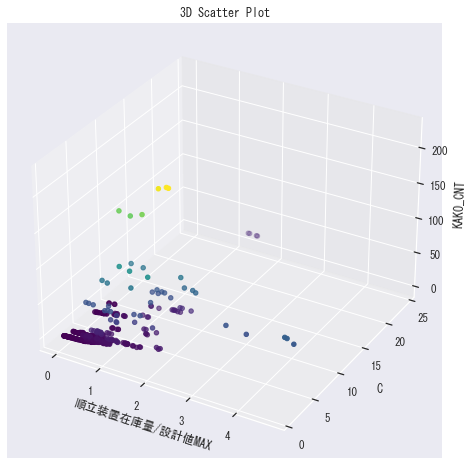

In [68]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

# データの読み込み
file_path_new = 'data.csv'
data = pd.read_csv(file_path_new, encoding='shift-jis')

# 散布図に使用するデータの選択
x = data['順立装置在庫量/設計値MAX']
y = data['B']
z = data['日量数（箱数）']

# 3D散布図の作成
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 散布図の描画
scatter = ax.scatter(x, y, z, c=z, cmap='viridis', marker='o')

# 軸ラベルとタイトルの設定
ax.set_xlabel('順立装置在庫量/設計値MAX')
ax.set_ylabel('C')
ax.set_zlabel('KAKO_CNT')
ax.set_title('3D Scatter Plot')

# 散布図の表示
plt.show()


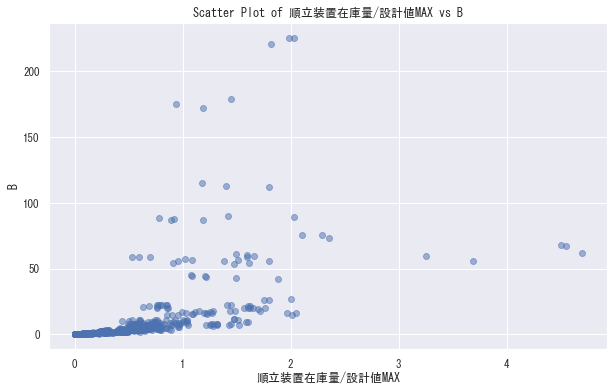

In [64]:
import matplotlib.pyplot as plt
import pandas as pd

# データの読み込み
file_path_new = 'data.csv'
data = pd.read_csv(file_path_new, encoding='shift-jis')

# 散布図に使用するデータの選択
x = data['順立装置在庫量/設計値MAX']
y = data['日量数（箱数）']

# 2D散布図の作成
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5)

# 軸ラベルとタイトルの設定
plt.xlabel('順立装置在庫量/設計値MAX',fontname='MS Gothic')
plt.ylabel('B')-
plt.title('Scatter Plot of 順立装置在庫量/設計値MAX vs B')

# 散布図の表示
plt.show()


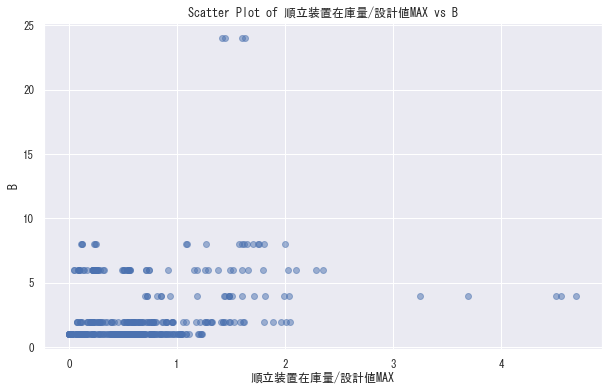

In [69]:
# 散布図に使用するデータの選択
x = data['順立装置在庫量/設計値MAX']
y = data['B']

# 2D散布図の作成
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5)

# 軸ラベルとタイトルの設定
plt.xlabel('順立装置在庫量/設計値MAX',fontname='MS Gothic')
plt.ylabel('B')
plt.title('Scatter Plot of 順立装置在庫量/設計値MAX vs B')

# 散布図の表示
plt.show()
